In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../src/')

import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pathlib import Path
import classifier

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
val_df = pd.read_pickle('../notebooks/covid_chexpert_val_df.pkl')
classifier_8 = classifier.Classifier(224, 1, 9)#, "chexphoto_challenge", "BCE")
#classifier_8.datagen_init(full_train_df, "../../data")
classifier_8.datagen_init_valid_old(val_df, "/home/anudeep/data/")
print(classifier_8.validation_generator.class_indices)
test = pd.Series(classifier_8.validation_generator.labels)
mlb = MultiLabelBinarizer()
y_labels = mlb.fit_transform(test)

val_df_15cls = pd.read_pickle('../notebooks/covid_chexpert_val_df_15cls.pkl')
#val_df = pd.read_pickle('../notebooks/covid_chexpert_val_df.pkl')
classifier_8 = classifier.Classifier(224, 1, 15)#, "chexphoto_challenge", "BCE")
#classifier_8.datagen_init(full_train_df, "../../data")
classifier_8.datagen_init_valid_old(val_df_15cls, "/home/anudeep/data/")
print(classifier_8.validation_generator.class_indices)

test = pd.Series(classifier_8.validation_generator.labels)
mlb = MultiLabelBinarizer()
y_labels_15cls = mlb.fit_transform(test)


val_df_15cls_large = pd.read_pickle('../notebooks/covid_chexpert_val_df_15cls_large.pkl')
#val_df = pd.read_pickle('../notebooks/covid_chexpert_val_df.pkl')
classifier_8 = classifier.Classifier(224, 1, 15)#, "chexphoto_challenge", "BCE")
#classifier_8.datagen_init(full_train_df, "../../data")
classifier_8.datagen_init_valid_old(val_df_15cls_large, "/home/anudeep/data/")
print(classifier_8.validation_generator.class_indices)
test = pd.Series(classifier_8.validation_generator.labels)
mlb = MultiLabelBinarizer()
y_labels_15cls_large = mlb.fit_transform(test)

pred_keras = np.load("../predictions/9cls_BCE_sigmoid_32.npy")
pred_keras_15cls = np.load("../predictions/15cls_BCE_Sigmoid_19.npy")
pred_keras_15cls_large = np.load("../predictions/15cls_BCE_Sigmoid_large_08.npy")

Found 1527 validated image filenames belonging to 9 classes.
{'': 0, 'Atelectasis': 1, 'Cardiomegaly': 2, 'Consolidation': 3, 'Covid': 4, 'Edema': 5, 'No Finding': 6, 'Pleural Effusion': 7, 'Pneumonia': 8}
Found 1527 validated image filenames belonging to 15 classes.
{'': 0, 'Atelectasis': 1, 'Cardiomegaly': 2, 'Consolidation': 3, 'Covid': 4, 'Edema': 5, 'Enlarged Cardiomediastinum': 6, 'Lung Lesion': 7, 'Lung Opacity': 8, 'No Finding': 9, 'Pleural Effusion': 10, 'Pleural Other': 11, 'Pneumonia': 12, 'Pneumothorax': 13, 'Support Devices': 14}
Found 1527 validated image filenames belonging to 15 classes.
{'': 0, 'Atelectasis': 1, 'Cardiomegaly': 2, 'Consolidation': 3, 'Covid': 4, 'Edema': 5, 'Enlarged Cardiomediastinum': 6, 'Lung Lesion': 7, 'Lung Opacity': 8, 'No Finding': 9, 'Pleural Effusion': 10, 'Pleural Other': 11, 'Pneumonia': 12, 'Pneumothorax': 13, 'Support Devices': 14}


# 9 class

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
pred_keras_chex = pred_keras[:234, [0, 1, 2, 3, 5, 7]]
y_labels_chex = y_labels[:234, [0, 1, 2, 3, 5, 7]]

In [5]:
thresh = [0.116, 0.189, 0.159, 0.18, 0.319, 0.34]
chexphoto_targets = ['Other', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

NameError: name 'roc_curve' is not defined

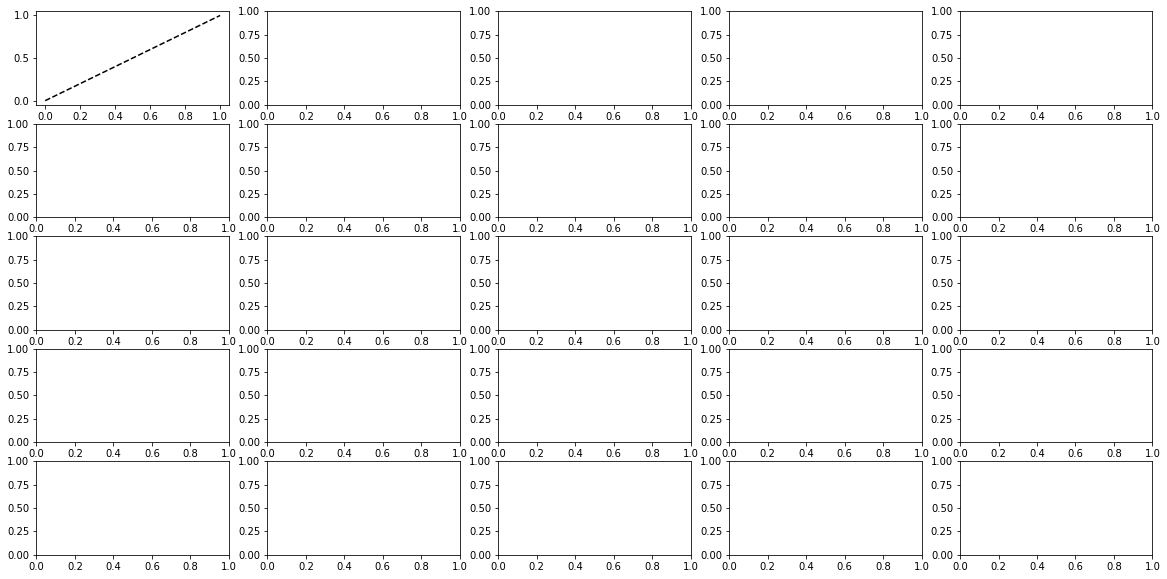

In [7]:
plot_individual_classes = True
if plot_individual_classes:
    f, ax = plt.subplots(5, 5, figsize=(20,10))
    _div = 5
    ROC_AUCs = []
    PR_AUCs = []
    thresholds = []
    fprs = []
    tprs = []

    for ii in [0, 1, 2, 3, 4, 5]:#, 4, 5, 6, 7]:#range(0, y_pred_keras.shape[1]):
        ax[ii//_div][ii%_div].plot([0, 1], [0, 1], 'k--')
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels_chex[:,ii], pred_keras_chex[:,ii])
        auc_keras = auc(fpr_keras, tpr_keras)
        ROC_AUCs.append(auc_keras)
        thresholds.append(thresholds_keras)
        fprs.append(fpr_keras)
        tprs.append(tpr_keras)
        ax[ii//_div][ii%_div].plot(fpr_keras, tpr_keras, label=chexphoto_targets[ii] + '(area = {:.3f})'.format(auc_keras))

        precision, recall, _ = sklearn.metrics.precision_recall_curve(y_labels_chex[:, ii], pred_keras_chex[:, ii])
        auc_keras = auc(recall, precision)
        PR_AUCs.append(auc_keras)
        ax[ii//_div][ii%_div].plot(recall, precision, label=chexphoto_targets[ii] + '(area = {:.3f})'.format(auc_keras))
        ax[ii//_div][ii%_div].set_title(chexphoto_targets[ii])

    plt.show()

In [6]:
mean_sen = []
mean_spec = []
y_preds = []
for k in range(len(thresh)):
    print(chexphoto_targets[k])
    print("--------------------")
    y_pred = np.copy(pred_keras_chex[:, k])
    y_pred[y_pred > thresh[k]] = 1
    y_pred[y_pred != 1] = 0
    tn, fp, fn, tp = confusion_matrix(y_labels_chex[:, k], y_pred).ravel()
    y_preds.append(y_pred)
    print(confusion_matrix(y_labels_chex[:, k], y_pred))
    print(f"sensitivity = {tp/(tp+fn)}")
    print(f"specificity = {tn/(tn+fp)}")
#     print(classification_report(y_labels[:, k], y_pred))
    print("------------------------------------------------------------------------------------------")
    mean_sen.append(tp/(tp+fn))
    mean_spec.append(tn/(tn+fp))
    
print(sum(mean_sen)/len(mean_sen))
print(sum(mean_spec)/len(mean_spec))

Other
--------------------
[[98 77]
 [16 43]]
sensitivity = 0.7288135593220338
specificity = 0.56
------------------------------------------------------------------------------------------
Atelectasis
--------------------
[[109  45]
 [ 12  68]]
sensitivity = 0.85
specificity = 0.7077922077922078
------------------------------------------------------------------------------------------
Cardiomegaly
--------------------
[[140  26]
 [ 25  43]]
sensitivity = 0.6323529411764706
specificity = 0.8433734939759037
------------------------------------------------------------------------------------------
Consolidation
--------------------
[[179  22]
 [ 11  22]]
sensitivity = 0.6666666666666666
specificity = 0.8905472636815921
------------------------------------------------------------------------------------------
Edema
--------------------
[[173  16]
 [ 13  32]]
sensitivity = 0.7111111111111111
specificity = 0.9153439153439153
-------------------------------------------------------------------